# Pyfeat Tutorial

### 1. Toy system: Data Generation

We will walk you through using the API of pyfeat for different simulation types and the different available estimators. As a simple initial example we will consider an asymmetric double well as the potential landscape and a single particle diffusing in this potential according to Brownian dynamics. For this purpose we have prepared a set of scripts that will run short simulations and write the trajectories to file in the correct pyfeat format. If you want to learn how to prepare data in a pyfeat format, it might be worthwhile to have a closer look at the data generating files (trajectory_factory.py). 

In [2]:
#imports
#allow for the embedding of plots into the ipython notebook. 
%pylab inline 
import trajectory_factory as tf #this is the package that allows the quick generation of input data for pyfeat

Populating the interactive namespace from numpy and matplotlib


Let us run a simulated tempering simulation. CAREFUL the data generation may take a little while.

In [3]:
tf.run_st_simulation() #generates simulated tempering data for pyfeat in the directory ST/

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Have a look at the *examples/ST/Traj.dat* file. This will give you a good idea as to how a trajectory should be written out for your own data.
All additional files written out will be needed for the analysis. The file *kT.dat* contains the reduced temperatures, *b_k_i.dat* is needed for WHAM and 
dTRAM and *exact.dat* contains the true stationary probabilities to which we will compare later.

### 2. Toy system: Simulated tempering data analysis

Now we have generated the data we want for the pyfeat analysis, it is time to import all the necessary packages from pyfeat

In [1]:
from pyfeat import xtram, wham, dtram #api function for pyfeat
from pyfeat import Reader #allows you to read the data from file in the correct format
from pyfeat import Forge #contains all the preformatted data that will then be passed to the estimators

ImportError: No module named pyfeat

The usual workflow for pyfeat is: Read the data with the reader, who will take a list of files as an agrument plus, any helper files such as a *kT file* or a *b_K_i file*. The reader object is then passed to the data converter (Forge).

In [5]:
trajlist = ['ST/Traj.dat']
reader = Reader( trajlist, b_K_i_file = 'ST/b_K_i.dat', kT_file='ST/kT.dat' ) #read trajectory and 'helper files'
forge = Forge( reader.trajs, kT_K = reader.kT_K, b_K_i = reader.b_K_i, kT_target = 0 ) #pass read data to the data forge

In [6]:
#load all the exact results
exact = np.loadtxt('ST/exact.dat')
exact[:,1] = exact[:,1]/np.sum(exact[:,1])

Now we have read all the data and can run our different estimators

#### 2.1 DTRAM

In [7]:
dtram_est = dtram( forge, lag=1 , maxiter=1000, ftol=1.0e-4, verbose=False )
print "#===============Thank you for using DTRAM============================="
dtram_est.cite(pre="#  ")
print "#====================================================================="

#===============Thank you for using DTRAM=============================
#  Statistically optimal analysis of state-discretized trajectory data
#  from multiple thermodynamic states;
#  Hao Wu, Antonia S.J.S. Mey, Edina Rosta, and Frank Noe
#  J. Chem. Phys. 141, 214106 (2014)
#=====================================================================


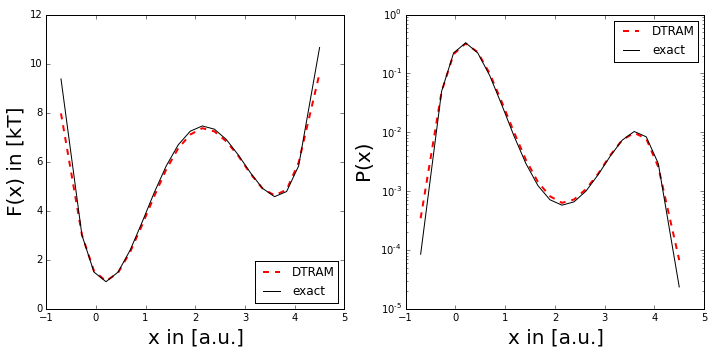

In [8]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0],dtram_est.f_i , color = 'r', linewidth = 2, linestyle='--', label='DTRAM' )
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0],dtram_est.pi_i , color = 'r', linewidth = 2, linestyle='--', label='DTRAM' )
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

#### 2.2 WHAM

In [7]:
wham_est = wham( forge, maxiter=1000, ftol=1.0e-7, verbose=False ) # and we are done, now we can analyse the results
print "#===============Thank you for using WHAM=================================================="
wham_est.cite(pre="#  ")
print "#========================================================================================="

#===============Thank you for using WHAM==================================================
#  The weighted histogram analysis method for free-energy calculations on biomolecules;
#  Shankar Kumar, John M. Rosenberg, Djamal Bouzida, Robert H. Swendsen and Peter A. Kollman
#  J. Comput. Chem. 13, 1011-1021 (1992)
#=========================================================================================


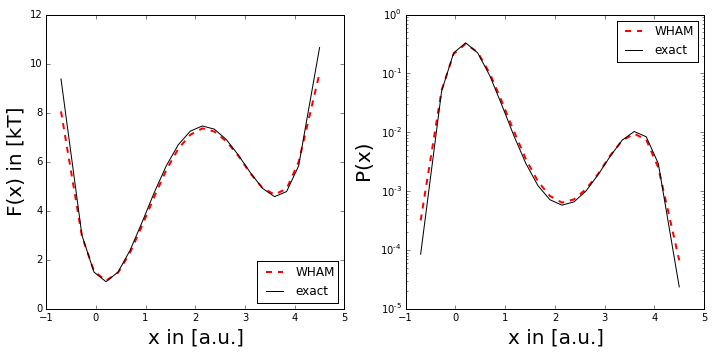

In [8]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0],wham_est.f_i , color = 'r', linewidth = 2, linestyle='--', label='WHAM' )
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0],wham_est.pi_i , color = 'r', linewidth = 2, linestyle='--', label='WHAM' )
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

#### 2.3 XTRAM

In [6]:
xtram_est = xtram( forge, lag=1 , maxiter=1000, ftol=1.0e-15, verbose=True )
print "#===============Thank you for using XTRAM===================================="
xtram_est.cite(pre="#  ")
print "#============================================================================"

#                    [Step]          [rel. Increment]
                         1        2.535225563452e-01
                         2        4.666450473528e-03
                         3        5.406074402792e-05
                         4        3.123149107331e-06
                         5        1.751942562134e-07
                         6        9.807060719069e-09
                         7        5.488953735977e-10
                         8        3.071831677914e-11
                         9        1.722844089613e-12
                        10        9.459100169806e-14
                        11        5.329070518201e-15
                        12        0.000000000000e+00
#===============Thank you for using XTRAM====================================
#  xTRAM: Estimating Equilibrium Expectations from Time-Correlated Simulation
#  Data at Multiple Thermodynamic States;
#  Antonia S.J.S. Mey, Hao Wu, and Frank Noe
#  Phys. Rev. X 4, 041018 (2014)
#=================================

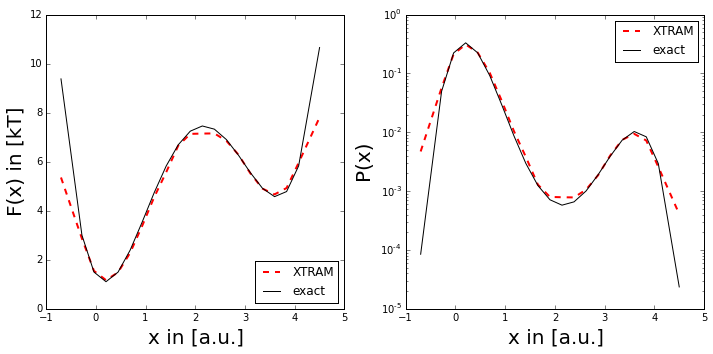

In [7]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0],xtram_est.f_i , color = 'r', linewidth = 2, linestyle='--', label='XTRAM' )
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0],xtram_est.pi_i , color = 'r', linewidth = 2, linestyle='--', label='XTRAM' )
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

### 3. Toy system: Umbrella sampling data analysis

In [8]:
tf.run_us_simulation() #generates umbrella sampling data for pyfeat in the directory US/

US simulation completed sucessfully!


In [9]:
trajlist = ['US/Traj0.dat', 'US/Traj1.dat', 'US/Traj2.dat', 'US/Traj3.dat', 'US/Traj4.dat', 'US/Traj5.dat', 'US/Traj6.dat',
            'US/Traj7.dat', 'US/Traj8.dat', 'US/Traj9.dat', 'US/Traj10.dat', 'US/Traj11.dat', 'US/Traj12.dat', 'US/Traj13.dat',
            'US/Traj14.dat', 'US/Traj15.dat', 'US/Traj16.dat', 'US/Traj17.dat', 'US/Traj18.dat', 'US/Traj19.dat', 'US/Traj20.dat',
            'US/Traj21.dat', 'US/Traj22.dat', 'US/Traj23.dat', 'US/Traj24.dat', 'US/Traj25.dat', 'US/Traj26.dat', 'US/Traj27.dat',
            'US/Traj28.dat', 'US/Traj29.dat']
reader = Reader( trajlist, b_K_i_file = 'US/b_K_i.dat' ) #read trajectory and 'helper files'
forge = Forge( reader.trajs, b_K_i = reader.b_K_i ) #pass read data to the data forge

In [10]:
#load all the exact results
exact = np.loadtxt('US/exact.dat')
exact[:,1] = exact[:,1]/np.sum(exact[:,1])

#### 3.1 DTRAM

In [11]:
dtram_est = dtram( forge, lag=1 , maxiter=10000, ftol=1.0e-6, verbose=False )
print "#===============Thank you for using DTRAM============================="
dtram_est.cite(pre="#  ")
print "#====================================================================="

#===============Thank you for using DTRAM=============================
#  Statistically optimal analysis of state-discretized trajectory data
#  from multiple thermodynamic states;
#  Hao Wu, Antonia S.J.S. Mey, Edina Rosta, and Frank Noe
#  J. Chem. Phys. 141, 214106 (2014)
#=====================================================================


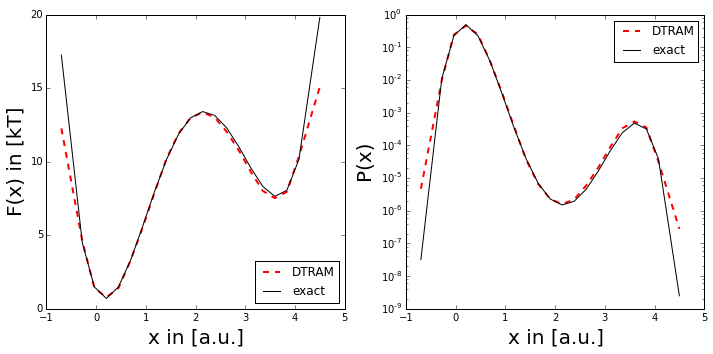

In [12]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0],dtram_est.f_i , color = 'r', linewidth = 2, linestyle='--', label='DTRAM' )
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0],dtram_est.pi_i , color = 'r', linewidth = 2, linestyle='--', label='DTRAM' )
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

#### 3.2 WHAM

In [13]:
wham_est = wham( forge, maxiter=20000, ftol=1.0e-7, verbose=False ) # and we are done, now we can analyse the results
print "#===============Thank you for using WHAM=================================================="
wham_est.cite(pre="#  ")
print "#========================================================================================="

#===============Thank you for using WHAM==================================================
#  The weighted histogram analysis method for free-energy calculations on biomolecules;
#  Shankar Kumar, John M. Rosenberg, Djamal Bouzida, Robert H. Swendsen and Peter A. Kollman
#  J. Comput. Chem. 13, 1011-1021 (1992)
#=========================================================================================


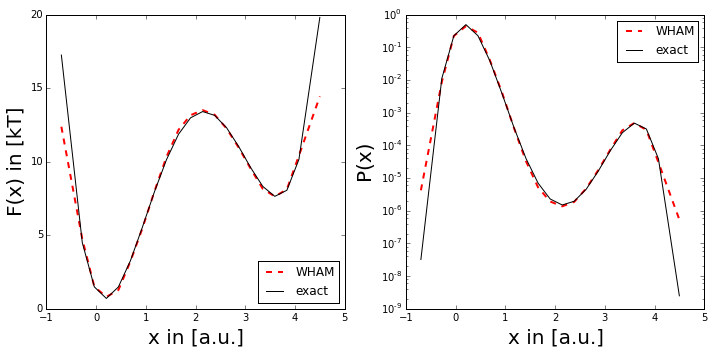

In [14]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0],wham_est.f_i , color='r', linewidth=2, linestyle='--', label='WHAM' )
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0],wham_est.pi_i , color='r', linewidth=2, linestyle='--', label='WHAM' )
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

Thank you for running the pyfeat asymetric double-well example. If you have any further questions, or notice any bugs, please notify us on the mailinglist **pyfeat@lists.fu-berlin.de**.